In [1]:
import numpy as np
import pandas as pd

In [2]:
#read the data.csv file
df=pd.read_csv('data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#drop the last column
df=df.dropna(axis=1)

In [5]:
print('Number of rows are :',df.shape[0], ',and number of columns are :',df.shape[1])

Number of rows are : 569 ,and number of columns are : 32


In [6]:
#also delete the id_ column
df=df.iloc[:,1:-1]


In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [8]:
#describe the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-null    fl

In [9]:
#get the count of malignant(<M>) and benign(<B>) class data
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Data Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go

%matplotlib inline
sns.set_style('darkgrid')

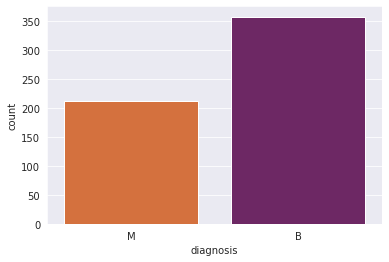

In [11]:
sns.countplot(data=df,x="diagnosis",palette="inferno_r")
plt.show()




# Data Filtering

In [12]:
#Use label encoder to encode the categorical value into integer values
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df.iloc[:,0]= label_encoder.fit_transform(df.iloc[:,0].values)

/tmp/ipykernel_37395/3070794911.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,0]= label_encoder.fit_transform(df.iloc[:,0].values)


In [13]:
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [14]:
df.shape

(569, 30)

In [15]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

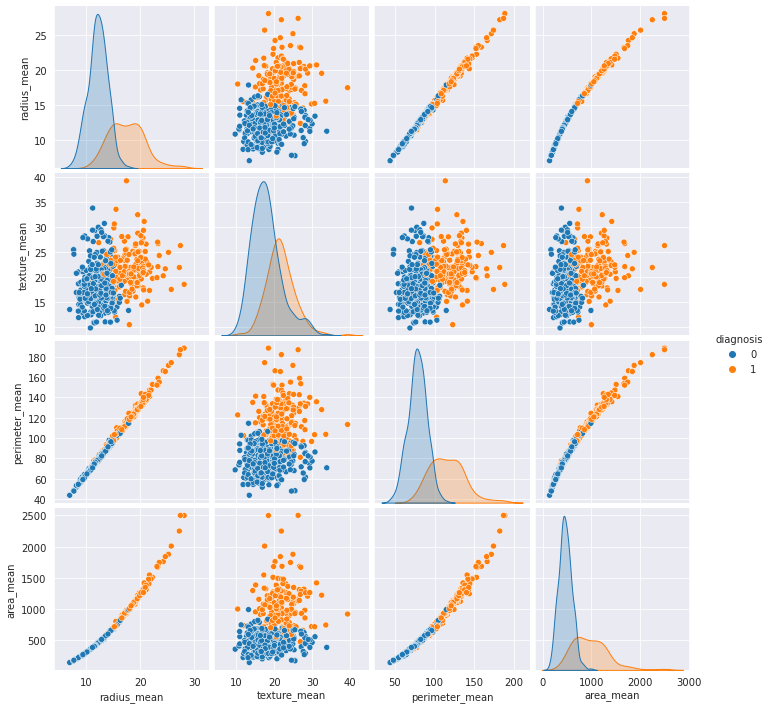

In [16]:
sns.pairplot(df.iloc[:,0:5],hue="diagnosis")

In [17]:
#split the dataset into independent(X) and dependent(Y) dataset

# X=df.iloc[:,1:32].values
# Y=df.iloc[:,0].values`
X=df.drop("diagnosis",axis=1)  #feature matrix
Y=df["diagnosis"]

In [18]:
Y.shape

(569,)

In [19]:
#split dataset into the tarining and testing datset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [20]:
X_train.iloc[:,0:10].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.316083,0.998185,0.987094,0.164226,0.508985,0.669625,0.823662,0.130193,-0.330992
texture_mean,0.316083,1.000000,0.322445,0.318626,-0.023107,0.241977,0.298975,0.292473,0.064376,-0.071964
perimeter_mean,0.998185,0.322445,1.000000,0.986692,0.197597,0.555299,0.705993,0.850247,0.161548,-0.286012
area_mean,0.987094,0.318626,0.986692,1.000000,0.170459,0.500276,0.679675,0.823160,0.131129,-0.302548
smoothness_mean,0.164226,-0.023107,0.197597,0.170459,1.000000,0.643792,0.503715,0.540170,0.536098,0.569111
compactness_mean,0.508985,0.241977,0.555299,0.500276,0.643792,1.000000,0.879782,0.832933,0.583548,0.540311
concavity_mean,0.669625,0.298975,0.705993,0.679675,0.503715,0.879782,1.000000,0.914627,0.477989,0.326375
concave points_mean,0.823662,0.292473,0.850247,0.823160,0.540170,0.832933,0.914627,1.000000,0.443281,0.143624
symmetry_mean,0.130193,0.064376,0.161548,0.131129,0.536098,0.583548,0.477989,0.443281,1.000000,0.460547
fractal_dimension_mean,-0.330992,-0.071964,-0.286012,-0.302548,0.569111,0.540311,0.326375,0.143624,0.460547,1.000000


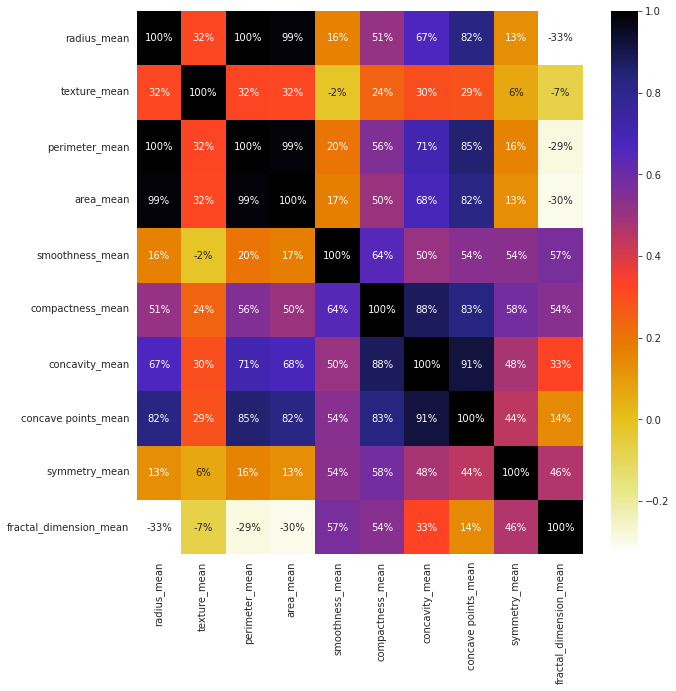

In [21]:
#Corrlation Matrix--pearson correlation

import seaborn as sns
plt.figure(figsize=(10,10))
# plt.title('Co-relation Matrix on Training dataset')
cor=X_train.iloc[:,0:10].corr()
sns.heatmap(cor,annot=True ,fmt=".0%", cmap=plt.cm.CMRmap_r)
plt.show()

In [22]:
#with the following function we can select highly correlated features
# it will remove the first feature that is correated with anything other features

def correlation(dataset,threshold):
    col_corr=set() # set of all corelated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]> threshold):
                colname=corr_matrix.columns[i] # getting the name of the columns
                col_corr.add(colname)
    return col_corr

In [23]:
corr_features=correlation(X_train,0.9)# threshold -> 90
len(set(corr_features))

10

In [24]:
corr_features

{'area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

In [25]:
#now remove the correalted features from the both test and trained datasets
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst
512,13.40,20.52,0.11060,0.14690,0.14450,0.2116,0.07325,0.3906,0.9306,0.005414,0.022650,0.034520,0.013340,0.01705,0.004005,0.15740,0.38560,0.51060,0.3585
457,13.21,25.25,0.08791,0.05205,0.02772,0.1619,0.05584,0.2084,1.3500,0.005768,0.008082,0.015100,0.006451,0.01347,0.001828,0.12890,0.10630,0.13900,0.2444
439,14.02,15.66,0.07966,0.05581,0.02087,0.1589,0.05586,0.2142,0.6549,0.004837,0.009238,0.009213,0.010760,0.01171,0.002104,0.10340,0.10170,0.06260,0.2136
298,14.26,18.17,0.06576,0.05220,0.02475,0.1635,0.05586,0.2300,0.6690,0.003169,0.013770,0.010790,0.005243,0.01103,0.001957,0.09445,0.21670,0.15650,0.2636
37,13.03,18.42,0.08983,0.03766,0.02562,0.1467,0.05863,0.1839,2.3420,0.004352,0.004899,0.013430,0.011640,0.02671,0.001777,0.09701,0.04619,0.04833,0.1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,17.42,25.56,0.10060,0.11460,0.16820,0.1308,0.05866,0.5296,1.6670,0.031130,0.085550,0.143800,0.039270,0.02175,0.012560,0.12430,0.17930,0.28030,0.1603
519,12.75,16.70,0.11250,0.11170,0.03880,0.2120,0.06623,0.3834,1.0030,0.007509,0.015610,0.019770,0.009199,0.01805,0.003629,0.14750,0.19790,0.14230,0.3071
432,20.18,19.54,0.11330,0.14890,0.21330,0.1724,0.06053,0.4331,1.0010,0.009087,0.027150,0.055460,0.019100,0.02451,0.004005,0.16650,0.29420,0.53080,0.3032
516,18.31,20.58,0.10680,0.12480,0.15690,0.1860,0.05941,0.5449,0.9225,0.006176,0.018770,0.029130,0.010460,0.01559,0.002725,0.14920,0.25360,0.37590,0.3074


# Feature Selection
Feature Importance

 Univariant Selection


In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [27]:
##Apply selectKBest Algorithm,,select top 10 features
ordered_rank_feature=SelectKBest(score_func=chi2,k=10)
ordered_feature=ordered_rank_feature.fit(X,Y)

In [28]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

In [29]:
feature_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [30]:
feature_rank.columns=['featrures','scores']
feature_rank

,featrures,scores
0,radius_mean,266.104917
1,texture_mean,93.897508
2,perimeter_mean,2011.102864
3,area_mean,53991.655924
4,smoothness_mean,0.149899
5,compactness_mean,5.403075
6,concavity_mean,19.712354
7,concave points_mean,10.544035
8,symmetry_mean,0.257380
9,fractal_dimension_mean,0.000074


In [31]:
#sort them in descending order and select top 10
feature_rank.nlargest(10,'scores')

,featrures,scores
23,area_worst,112598.431564
3,area_mean,53991.655924
13,area_se,8758.504705
22,perimeter_worst,3665.035416
2,perimeter_mean,2011.102864
20,radius_worst,491.689157
0,radius_mean,266.104917
12,perimeter_se,250.571896
21,texture_worst,174.449400
1,texture_mean,93.897508


# Feature Importance
This technique gives you a score for each feature of your data, the higher the score the more relavent is

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
# import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [33]:
print(model.feature_importances_)

[0.05440171 0.01894387 0.06600829 0.05871808 0.01392367 0.03270472
 0.06160534 0.10951315 0.00847567 0.00695071 0.01989022 0.00620093
 0.01790341 0.01661711 0.00606926 0.00707579 0.00737933 0.00718791
 0.00700357 0.00558845 0.07565948 0.02661432 0.09421271 0.07565585
 0.01867423 0.02723164 0.04183029 0.09789158 0.0100687 ]


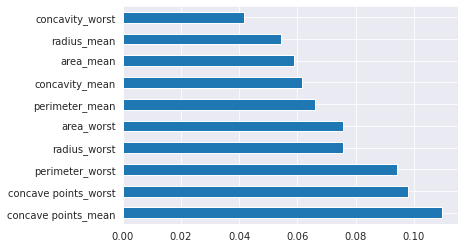

In [34]:
#plot the visualization graph
ranked_features=pd.Series(model.feature_importances_,index=X.columns)

ranked_features.nlargest(10).plot(kind='barh')
plt.show()

# EDA

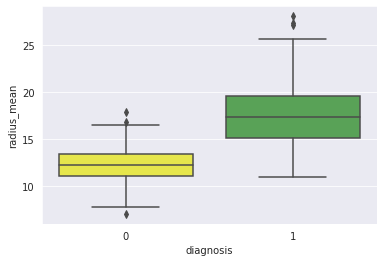

In [35]:
sns.boxplot(data=df,x="diagnosis",y="radius_mean",palette="Set1_r")
plt.show()

#Malignant tumors have larger radius. So we can say; Malignant cancer cells are larger in size than benign cancer cells.

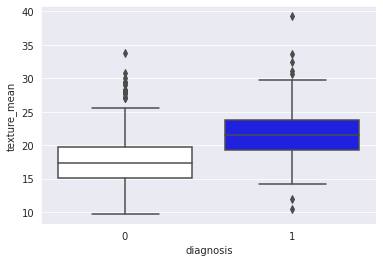

In [36]:
sns.boxplot(data=df,x="diagnosis",y="texture_mean",palette="flag")
plt.show()

Again, the tissue average of malignant cancer cells is larger.

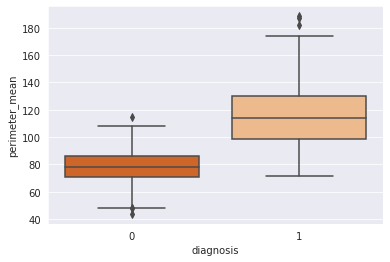

In [37]:
sns.boxplot(data=df,x="diagnosis",y="perimeter_mean",palette="Oranges_r")
plt.show()

Perimeter thickness of malignant cancer cells is greater than that of benign cancer cells.

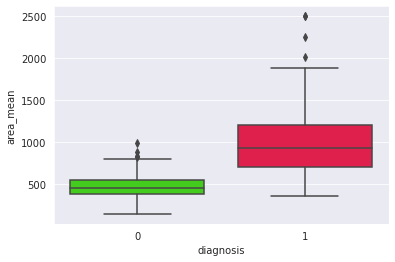

In [38]:
sns.boxplot(data=df,x="diagnosis",y="area_mean",palette="prism")
plt.show()


The area occupied by malignant cancer cells is greater than that of benign cancer cells.

# Perform Feature Standerd Scalling
Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

In [39]:
#feature scaling
from sklearn.preprocessing import StandardScaler
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

In [40]:
#create the function for the accuracy of Logistic regression,decision tree and random forest ML Algo
def models(X_train,Y_train):
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    
    
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(random_state=0,criterion="entropy")
    tree.fit(X_train,Y_train)
    
    #Random forest
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(random_state=0,criterion="entropy",n_estimators=10)
    forest.fit(X_train,Y_train)
    
    
    #Support vector machine
    from sklearn.svm import SVC
    svm = SVC(kernel= 'linear', random_state=1,C=.01)
    svm.fit(X_train,Y_train)
    
    #accuracy of the all models(ml algo's)
    print("[0]Logistic Regression Accuracy: ",log.score(X_train,Y_train))
    print("[1]Decision Tree Accuracy: ",tree.score(X_train,Y_train))
    print("[2]Random forest Accuracy: ",forest.score(X_train,Y_train))
    print("[3]Support Vector Machine Accuracy: ",svm.score(X_train,Y_train))
    
    return log,tree,forest,svm

In [41]:
Model = [ 'Logistic-Regression', 'Decision-Tree', 'Random-Forest' , 'Support-Vector-Machine' ]

In [42]:
model=models(X_train,Y_train)

[0]Logistic Regression Accuracy:  0.9912087912087912
[1]Decision Tree Accuracy:  1.0
[2]Random forest Accuracy:  0.9978021978021978
[3]Support Vector Machine Accuracy:  0.9736263736263736


In [43]:
Model = [ 'Logistic Regression', 'Decision Tree', 'Random forest' ,'Support vector Machine']

In [44]:
#now test the model/results
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
df_prediction=[]
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]
for i in range(len(model)):
    print("Classification Report of : ",Model[i],"\n")
    print(classification_report(Y_test,model[i].predict(X_test)))
    print(" Accuracy : ",accuracy_score(Y_test,model[i].predict(X_test)),"\n")
    df_prediction.append([Model[i], model[i].score(X_train,Y_train), accuracy_score(Y_test,model[i].predict(X_test)), "{0:.2%}".format(accuracy_score(Y_test,model[i].predict(X_test)))])
    
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)

Classification Report of :  Logistic Regression 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

 Accuracy :  0.9649122807017544 

Classification Report of :  Decision Tree 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.93      0.91      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

 Accuracy :  0.9385964912280702 

Classification Report of :  Random forest 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.

In [45]:
df_pred

,model_name,score,accuracy_score,accuracy_percentage
0,Logistic Regression,0.991209,0.964912,96.49%
1,Decision Tree,1.000000,0.938596,93.86%
2,Random forest,0.997802,0.973684,97.37%
3,Support vector Machine,0.973626,0.964912,96.49%


print the hightest accuracy score using sort values

In [46]:
df_pred.sort_values('accuracy_percentage', ascending=False)

,model_name,score,accuracy_score,accuracy_percentage
2,Random forest,0.997802,0.973684,97.37%
0,Logistic Regression,0.991209,0.964912,96.49%
3,Support vector Machine,0.973626,0.964912,96.49%
1,Decision Tree,1.000000,0.938596,93.86%


# K-Fold Applying
To check where the model overfitted or not 

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

#    # HyperTunning the ML Model

<b>Tuning Parameters applying...</b>

<b> For HyperTunning we can use GridSearchCV to know the best performing parameters</b>

GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.